In [1]:
import numpy as np
import time

In [8]:
a = np.random.rand(1000000)
b = np.random.rand(1000000)

tic = time.time()
c = np.dot(a,b)
toc = time.time()
print(c)
print('Vectorized version:'+str(1000*(toc-tic))+'ms')

c = 0
tic = time.time()
for i in range(1000000):
    c += a[i]*b[i]
toc = time.time()
print(c)
print('For loop:'+str(1000*(toc-tic))+'ms')

250123.94454583232
Vectorized version:1.0676383972167969ms
250123.94454582286
For loop:388.2730007171631ms


In [67]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

In [12]:
x = np.array([1,2,3])
print(sigmod(x))

[0.73105858 0.88079708 0.95257413]


In [25]:
data = np.array([
    [56.0,0.0,4.4,68.0],
    [1.2,104.0,52.0,8.0],
    [1.8,135.0,99.0,0.9]
])

cal = data.sum(axis=0)
print(cal)
percentage = 100*data/cal.reshape(1,4)
print(percentage[:1])

[ 59.  239.  155.4  76.9]
[[94.91525424  0.          2.83140283 88.42652796]]


In [26]:
a = np.random.rand(5)
print(a)

[0.07001837 0.51334504 0.30227176 0.94413465 0.55810136]


In [27]:
print(a.shape)

(5,)


In [28]:
print(a.T)

[0.07001837 0.51334504 0.30227176 0.94413465 0.55810136]


In [30]:
print(np.dot(a,a.T))

1.5626612896881777


In [31]:
a = np.random.rand(5,1)

In [32]:
print(a.T)

[[0.57577756 0.82622532 0.73223484 0.81973042 0.42275418]]


In [33]:
print(np.dot(a,a.T))

[[0.3315198  0.47572201 0.4216044  0.47198238 0.24341237]
 [0.47572201 0.68264829 0.60499097 0.67728203 0.34929021]
 [0.4216044  0.60499097 0.53616787 0.60023518 0.30955534]
 [0.47198238 0.67728203 0.60023518 0.67195796 0.34654446]
 [0.24341237 0.34929021 0.30955534 0.34654446 0.17872109]]


In [37]:
assert(a.shape == (5,2))

AssertionError: 

In [38]:
def initialize_with_zero(dim):
    w = np.zeros((dim,1))
    b = 0
    return w,b

In [41]:
w , b = initialize_with_zero(2)
print(w,b)

[[0.]
 [0.]] 0


In [48]:
def propagate(w,b,X,Y):
    m = X.shape[1]
    A = sigmod(np.dot(w.T,X)+b)
    cost = -1 / m * np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))
    dw = 1/m * np.dot(X,(A-Y).T)
    db = 1/m * np.sum(A - Y)
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    grads = {'dw':dw,'db':db}
    return grads,cost

In [49]:
w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]), np.array([[1,0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


In [90]:
def optimize(w,b,X,Y,num_iterations,learning_rate,print_cost = False):
    costs = []
    for i in range(num_iterations):
        grads,cost = propagate(w,b,X,Y)
        dw = grads['dw']
        db = grads['db']
        w = w - learning_rate * dw
        b = b - learning_rate * db
        if i % 100 == 0:
            print(f'Cost after {i} is {cost}')
            costs.append(cost)
    params = {'w':w,'b':b}
    grads = {'dw':dw, 'db':db}
    return params, grads, costs

In [54]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print(costs)

Cost after100 is 6.000064773192205
w = [[0.99100061]
 [1.98200178]]
b = 1.9955005829243777
dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
[6.000064773192205]


In [68]:
def predict(w,b,X):
    m = X.shape[1]
    Y_predict = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    A = sigmoid(np.dot(w.T, X) + b)
    for i in range(A.shape[1]):
        Y_predict[:,(A<0.5).nonzero()] = 0
        Y_predict[:,(A>=0.5).nonzero()] = 1
    assert(Y_predict.shape == (1,m))
    return Y_predict

In [69]:
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1.]]


In [94]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    w,b = initialize_with_zero(X_train.shape[0])
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = params["w"]
    b = params["b"]
    Y_predict_train = predict(w,b,X_train)
    Y_predict_test = predict(w,b,X_test)
    print(f'train accuracy: {100 - np.mean(np.abs(Y_predict_train - Y_train)) * 100} %')
    print(f'test accuracy: {100 - np.mean(np.abs(Y_predict_test - Y_test)) * 100} %') 
    d = {"costs": costs,
         "Y_prediction_test": Y_predict_test, 
         "Y_prediction_train" : Y_predict_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    return d

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T


train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after 0 is 0.6931471805599453
Cost after 100 is 0.5845083636993086
Cost after 200 is 0.4669490409465547
Cost after 300 is 0.37600686694802077
Cost after 400 is 0.3314632893282512
Cost after 500 is 0.30327306747438293
Cost after 600 is 0.2798795865826048
Cost after 700 is 0.2600421369258757
Cost after 800 is 0.2429406846779662
Cost after 900 is 0.22800422256726066
Cost after 1000 is 0.21481951378449635
Cost after 1100 is 0.20307819060644988
Cost after 1200 is 0.19254427716706862
Cost after 1300 is 0.18303333796883509
Cost after 1400 is 0.1743985943844888
Cost after 1500 is 0.16652139705400335
Cost after 1600 is 0.15930451829756614
Cost after 1700 is 0.15266732471296504
Cost after 1800 is 0.1465422350398234
Cost after 1900 is 0.14087207570310162
train accuracy: 98.56459330143541 %
test accuracy: 70.0 %


y = 1, you predicted that it is a "cat" picture.


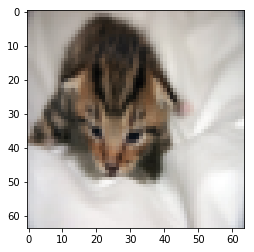

In [102]:
index = 1
plt.imshow(test_set_x[:,index].reshape((num_px,num_px,3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(d["Y_prediction_test"][0,index])].decode("utf-8") +  "\" picture.")

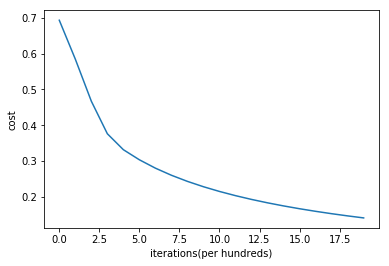

In [103]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations(per hundreds)')
plt.show()

learning rate is [0.01, 0.001, 0.0001]
Cost after 0 is 0.6931471805599453
Cost after 100 is 0.8239208681628492
Cost after 200 is 0.41894435617990905
Cost after 300 is 0.6173497044442353
Cost after 400 is 0.522115771143772
Cost after 500 is 0.38770874841422076
Cost after 600 is 0.23625445672268533
Cost after 700 is 0.15422213306419108
Cost after 800 is 0.13532782831668685
Cost after 900 is 0.12497148000450928
Cost after 1000 is 0.11647833125802606
Cost after 1100 is 0.10919251128268528
Cost after 1200 is 0.10280446418272612
Cost after 1300 is 0.09712981007993493
Cost after 1400 is 0.09204326923636809
train accuracy: 99.04306220095694 %
test accuracy: 68.0 %
learning rate is [0.01, 0.001, 0.0001]
Cost after 0 is 0.6931471805599453
Cost after 100 is 0.5912894260003537
Cost after 200 is 0.5557961107127088
Cost after 300 is 0.5289765131562366
Cost after 400 is 0.5068812917435517
Cost after 500 is 0.4878798632171657
Cost after 600 is 0.47110827803124367
Cost after 700 is 0.456045809698285
Co

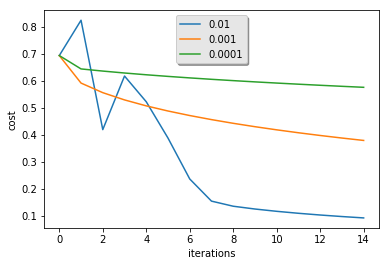

In [104]:
learning_rates = [0.01,0.001,0.0001]
models = {}
for i in learning_rates:
    print(f'learning rate is {learning_rates}')
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))
plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [109]:
data = [[1,2,3,4,5,6,7],[7,6,5,4,3,2,1],[2,3,3,2,4,6,1]]
plt.plot(np.squeeze(data),label=['a','b','c'])
le = plt.legend(loc='upper center', shadow=True)
frame = le.get_frame()
frame.set_facecolor('0.90')
plt.show()

[[1 2 3 4 5 6 7]
 [7 6 5 4 3 2 1]
 [2 3 3 2 4 6 1]]
